In [12]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.cluster import KMeans

In [4]:
dir = r'C:\Users\noaht\Documents\Data_Mining\Project 4'
graph_dir = r'C:\Users\noaht\Documents\Data_Mining\Project 4\Graphs'
os.chdir(dir)

In [7]:
df = pd.read_csv('Ready_Data.csv')

In [8]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [15]:
# Normilize data 
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled,columns = df.columns)

In [17]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_df)
    distortions.append(kmeanModel.inertia_)

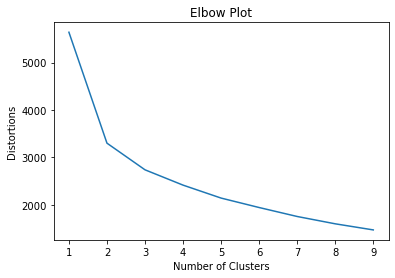

In [23]:
os.chdir(graph_dir)
elbow = sns.lineplot(x = K, y = distortions)
elbow.set(xlabel = 'Number of Clusters', ylabel = 'Distortions', title = 'Elbow Plot')
fig = elbow.get_figure()
fig.savefig('Elbow_Plot' + '.png')

In [28]:
pca = PCA(2)
df_2d = pca.fit_transform(scaled_df)

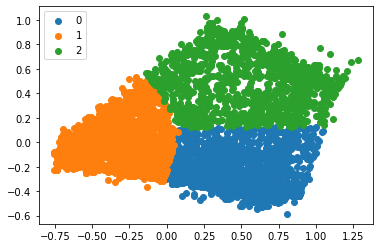

In [29]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_2d)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df_2d[label == i , 0] , df_2d[label == i , 1] , label = i)
plt.legend()
plt.show()